# Exploratory Data Analysis

## Load Data

In [7]:
import numpy as np
import pandas as pd

# Load the data
img_1 = np.loadtxt("../../data/image_data/image1.txt")
img_2 = np.loadtxt("../../data/image_data/image2.txt")
img_3 = np.loadtxt("../../data/image_data/image3.txt")
all_imgs = np.concatenate((img_1, img_2, img_3), axis=0)

# Create a DataFrame for each image and one for all images
columns = ["y", "x", "label", "NDAI", "SD", "CORR", "DF Angle", "CF Angle", "BF Angle", "AF Angle", "AN Angle"]
img_1_df = pd.DataFrame(img_1, columns=columns)
img_2_df = pd.DataFrame(img_2, columns=columns)
img_3_df = pd.DataFrame(img_3, columns=columns)
all_imgs_df = pd.DataFrame(all_imgs, columns=columns)

# Replace labels with human-readable descriptions
img_1_df["label"] = img_1_df["label"].replace({-1: "No Cloud", 1: "Cloud", 0: "Unlabeled"})
img_2_df["label"] = img_2_df["label"].replace({-1: "No Cloud", 1: "Cloud", 0: "Unlabeled"})
img_3_df["label"] = img_3_df["label"].replace({-1: "No Cloud", 1: "Cloud", 0: "Unlabeled"})
all_imgs_df["label"] = all_imgs_df["label"].replace({-1: "No Cloud", 1: "Cloud", 0: "Unlabeled"})

## Label Distribution

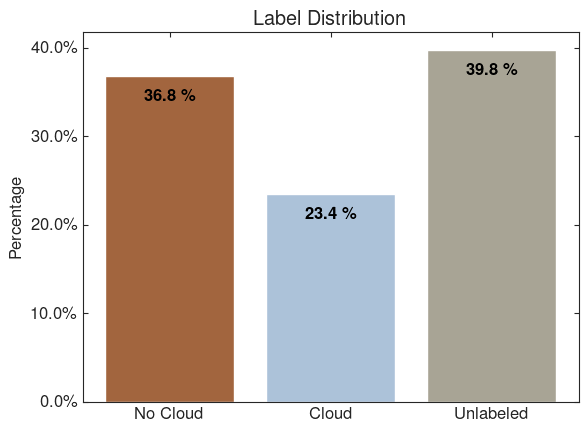

In [2]:
# Bar plot of label distribution
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

# Set plot style
sns.set_style("white")
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] =  "Helvetica"
plt.rcParams["font.size"] = 12
plt.rcParams["xtick.direction"] = "in" 
plt.rcParams["ytick.direction"] = "in" 
plt.rcParams["xtick.top"] = True
plt.rcParams["xtick.bottom"] = True 
plt.rcParams["ytick.right"] = True 
plt.rcParams["ytick.left"] = True

color_map = {"No Cloud": "xkcd:earth", "Cloud": "xkcd:cloudy blue", "Unlabeled": "xkcd:greyish"}


fig, ax_labels = plt.subplots()
# Prepare data
label_counts = all_imgs_df["label"].value_counts(normalize=True)
label_counts = label_counts.reindex(["No Cloud", "Cloud", "Unlabeled"])
# Create bar plot
plt.bar(label_counts.index, label_counts, color=color_map.values())
# Add percentage labels
ax_labels.bar_label(
    ax_labels.containers[0],
    labels=[r"\textbf{" + f"{p*100:.3}" + r" \%}" for p in label_counts],
    fontsize=12,
    color="black",
    weight="bold",
    label_type="edge",
    padding=-20,
)
# Plot formatting
plt.title("Label Distribution")
plt.ylabel("Percentage")
ax_labels.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1))
plt.yticks(np.arange(0, 0.5, 0.1))
plt.savefig("../../figs/eda_label_distribution.pdf")
plt.show()

## Labels on a map

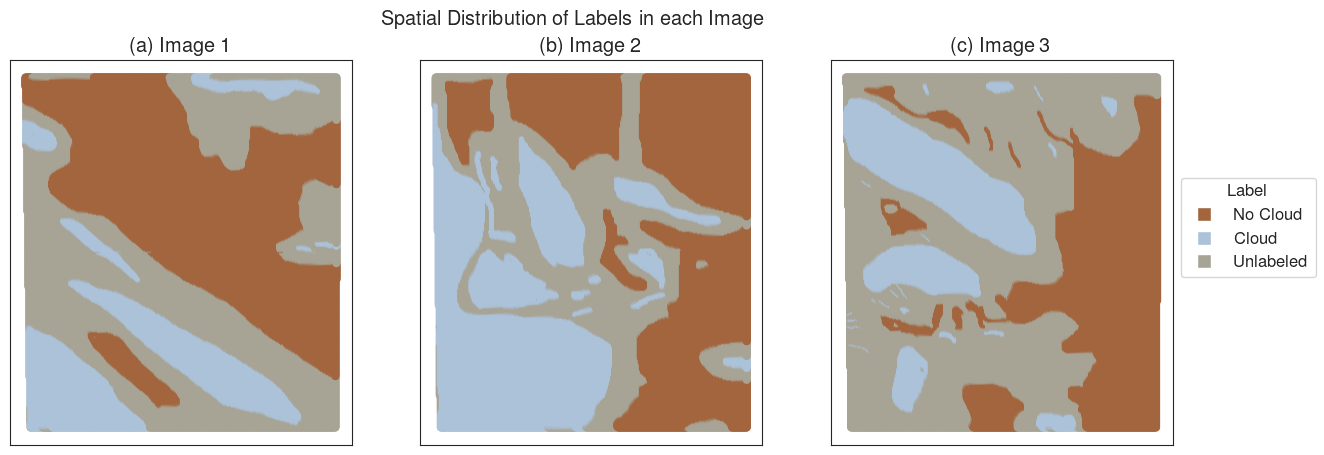

In [3]:
# Plot each of the images next to each other
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, img_df in enumerate([img_1_df, img_2_df, img_3_df]):
    sns.scatterplot(data=img_df, x="x", y="y", hue="label", palette=color_map, ax=axs[i], edgecolor="none")
    axs[i].set_title(f"({chr(97+i)}) Image {i+1}")
    # Remove axis labels
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_xlabel(None)
    axs[i].set_ylabel(None)
    # Remove legend from each subplot
    axs[i].get_legend().remove()
    
# Add global legend
handles = [plt.Line2D(
    [0], 
    [0], 
    marker="s", 
    color="w", 
    markerfacecolor=color_map[label], 
    markersize=10, 
    label=label) 
    for label in color_map.keys()]
fig.legend(handles=handles, labels=color_map.keys(), loc="center right", title="Label")
# Add global title
plt.suptitle("Spatial Distribution of Labels in each Image")
plt.savefig("../../figs/eda_label_distribution_map.pdf")
plt.show()

## Distribution of Features by Labels

/var/folders/dn/rkkxq6wj6tzgm8gxb2zx45hr0000gn/T/ipykernel_53453/3433706126.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_imgs_labeled_df["label"] = pd.Categorical(all_imgs_labeled_df["label"], categories=["Cloud", "No Cloud"])


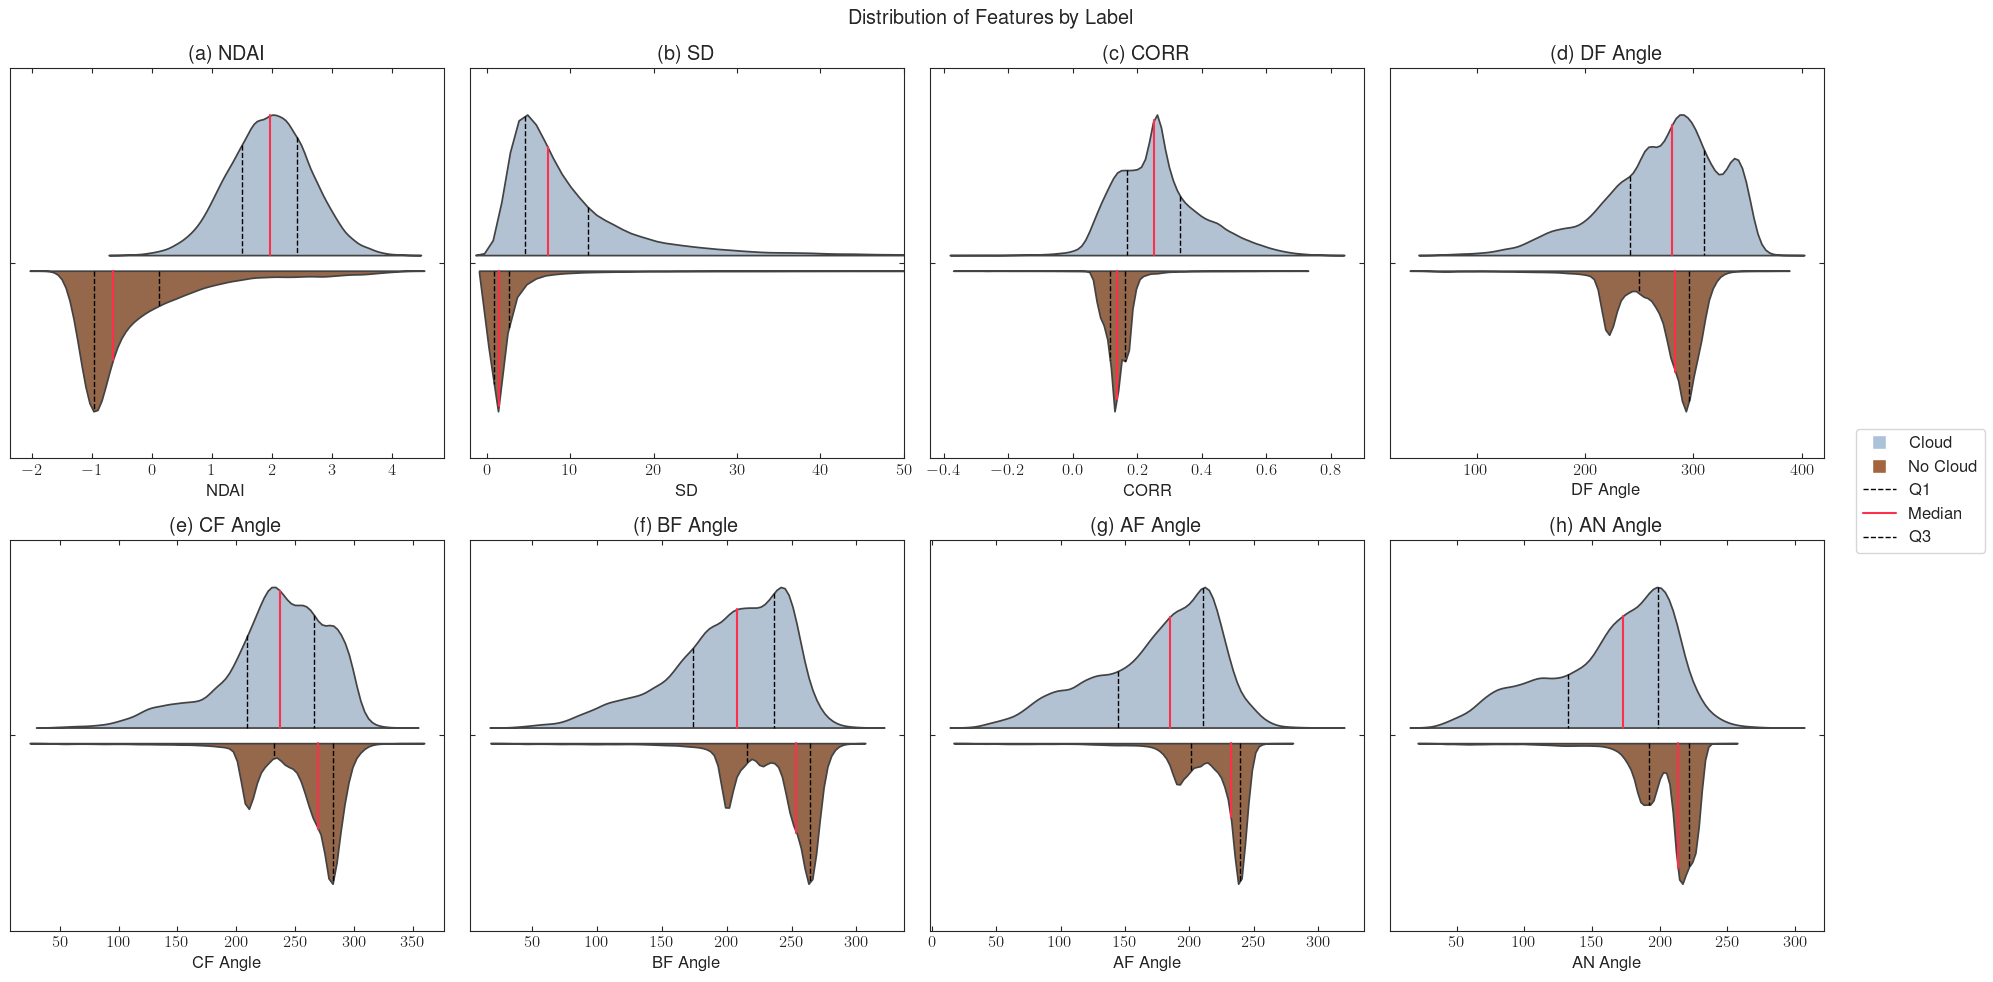

In [4]:
# Plot violin plot of each feature by label
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Remove rows with label "Unlabeled"
all_imgs_labeled_df = all_imgs_df[all_imgs_df["label"] != "Unlabeled"]
all_imgs_labeled_df["label"] = pd.Categorical(all_imgs_labeled_df["label"], categories=["Cloud", "No Cloud"])

# Plot each feature
for i, feature in enumerate(columns[3:]):
    # Plot violin plot
    sns.violinplot(data=all_imgs_labeled_df, x=feature, ax=axs[i//4, i%4], palette=color_map, inner="quartile", split=True, hue="label", gap=.1)
    axs[i//4, i%4].set_title(f"({chr(97+i)}) {feature}")
    # Cut tails for distributions with very long tails
    if feature == "SD":
        axs[i//4, i%4].set_xlim(-2, 50)
    # Remove legend
    axs[i//4, i%4].get_legend().remove()
    # Customize Quartile lines
    for line_idx, line in enumerate(axs[i//4, i%4].lines):
        # Median lines
        if line_idx in [1, 4]:
            line.set_linewidth(1.5)
            line.set_linestyle("-")
            line.set_color("xkcd:lightish red") 
        # Q1 and Q3 lines
        else:
            line.set_linewidth(1)
            line.set_linestyle("--")
            line.set_color("black")
            
    
# Add global legend
label_handles = [plt.Line2D(
    [0], 
    [0], 
    marker="s", 
    color="w", 
    markerfacecolor=color_map[label], 
    markersize=10, 
    label=label) 
    for label in all_imgs_labeled_df["label"].cat.categories]

quartile_handles = [
    plt.Line2D([0], [0], color="black", linestyle="--", linewidth=1, label="Q1"),
    plt.Line2D([0], [0], color="xkcd:lightish red", linestyle="-", linewidth=1.5, label="Median"),
    plt.Line2D([0], [0], color="black", linestyle="--", linewidth=1, label="Q3")
]
fig.legend(handles=label_handles + quartile_handles, loc="center right")
# Add global title
plt.suptitle("Distribution of Features by Label")
plt.tight_layout(rect=[0, 0, 0.925, 1])
plt.savefig("../../figs/eda_feature_distribution.pdf")
plt.show()


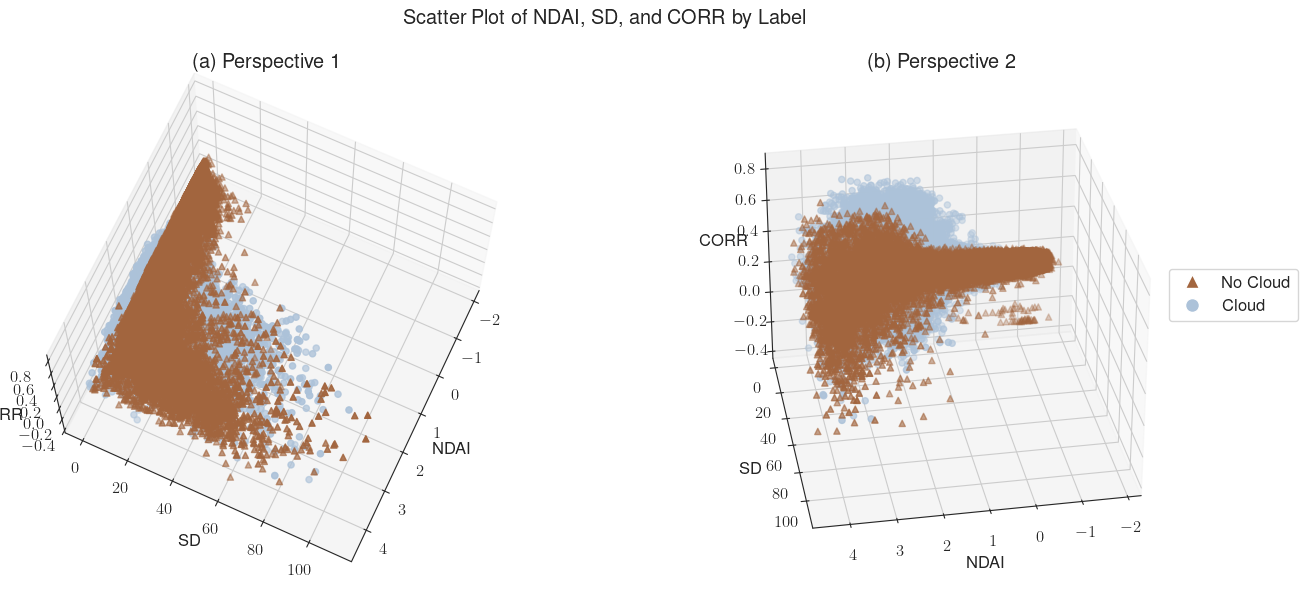

In [5]:
shape_map = {"No Cloud": "^", "Cloud": "o"}

# Create 3D scatter plots from two perspectives
fig = plt.figure(figsize=(14, 6))

# First perspective
ax1 = fig.add_subplot(121, projection="3d")
for label in all_imgs_labeled_df["label"].unique():
    subset = all_imgs_labeled_df[all_imgs_labeled_df["label"] == label]
    ax1.scatter(subset["NDAI"], subset["SD"], subset["CORR"],
                c=color_map[label], marker=shape_map[label], label=label)

ax1.set_xlabel("NDAI")
ax1.set_ylabel("SD")
ax1.set_zlabel("CORR")
ax1.set_title("(a) Perspective 1")
ax1.view_init(elev=70, azim=25)

# Second perspective
ax2 = fig.add_subplot(122, projection="3d")
for label in all_imgs_labeled_df["label"].unique():
    subset = all_imgs_labeled_df[all_imgs_labeled_df["label"] == label]
    ax2.scatter(subset["NDAI"], subset["SD"], subset["CORR"],
                c=color_map[label], marker=shape_map[label], label=label)
    

# 
ax2.set_xlabel("NDAI")
ax2.set_ylabel("SD")
ax2.set_zlabel("CORR")
ax2.set_title("(b) Perspective 2")
ax2.view_init(elev=30, azim=80)

# Add global title
plt.suptitle("Scatter Plot of NDAI, SD, and CORR by Label")

# Add global legend
handles = [plt.Line2D([0], [0], marker=shape, color="w", markerfacecolor=color, markersize=10, label=label) for label, shape, color in zip(all_imgs_labeled_df["label"].unique(), shape_map.values(), color_map.values())]
fig.legend(handles=handles, loc="center right")
plt.tight_layout()
fig.savefig("../../figs/eda_3d_scatter.png", dpi=300)
plt.show()

## Correlation of Features with Labels

In [6]:
# Convert labels to boolean
label_bool = all_imgs_labeled_df["label"].replace({"Cloud": 1, "No Cloud": 0})

/var/folders/dn/rkkxq6wj6tzgm8gxb2zx45hr0000gn/T/ipykernel_53453/561553797.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  label_bool = all_imgs_labeled_df["label"].replace({"Cloud": 1, "No Cloud": 0})
/var/folders/dn/rkkxq6wj6tzgm8gxb2zx45hr0000gn/T/ipykernel_53453/561553797.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  label_bool = all_imgs_labeled_df["label"].replace({"Cloud": 1, "No Cloud": 0})


In [70]:
from scipy.stats import pointbiserialr

# Calculate correlation of each feature with label
correlations = all_imgs_labeled_df[columns[3:]].apply(lambda x: pointbiserialr(label_bool, x)[0])

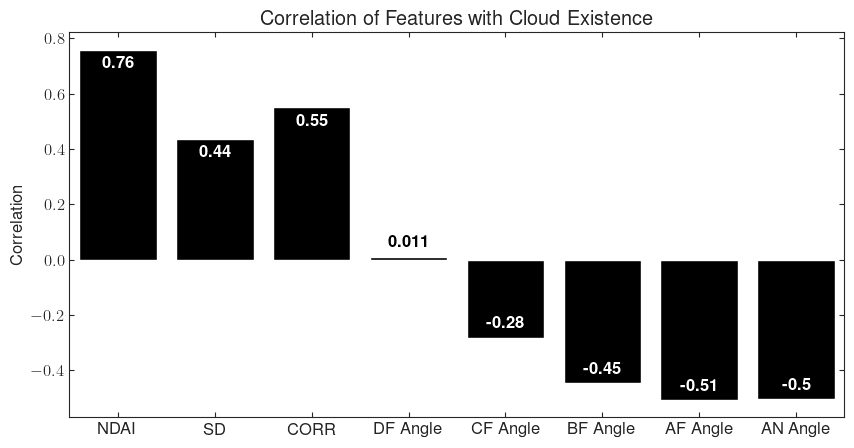

In [74]:
# Plot bar plot of correlation of each feature with label
fig, ax = plt.subplots(figsize=(10, 5))
# Create bar plot
sns.barplot(x=correlations.index, y=correlations, color="black", ax=ax)
ax.set_title("Correlation of Features with Cloud Existence")
ax.set_ylabel("Correlation")
ax.set_xlabel("")
bars = ax.patches
for i, bar in enumerate(bars):
    height = bar.get_height()
    label_color = "black" if i == 3 else "white"
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height - 0.05 if height > 0.05 else height + 0.05,
        r"\textbf{" + f"{height:.2}" r"}",
        ha="center",
        va="center",
        fontsize=12,
        color=label_color,
        weight="bold",
    )
plt.savefig("../../figs/correlation_features.pdf")
plt.show()



# Inspect Auto-Encoder

In [56]:
from ..autoencoder.autoencoder import ConvAutoencoder

# Load the best Autoencoder
autoencoder = ConvAutoencoder.load_from_checkpoint(
    "autoencoder/checkpoints/best-checkpoint-5875qymn.ckpt",
    map_location="cpu"
).eval()

In [57]:
from autoencoder_bogdan.data import CloudDataset

# Load the images as tensors
img1_file = "../data/image_data/image1.txt"
img2_file = "../data/image_data/image2.txt"
img3_file = "../data/image_data/image3.txt"

img1_dataset = CloudDataset(
    file_paths=[img1_file],
)
img2_dataset = CloudDataset(
    file_paths=[img2_file],
)
img3_dataset = CloudDataset(
    file_paths=[img3_file],
)

# Embed the images
img1_embeddings = autoencoder.embed(img1_dataset.features[0]).detach().numpy()
img2_embeddings = autoencoder.embed(img2_dataset.features[0]).detach().numpy()
img3_embeddings = autoencoder.embed(img3_dataset.features[0]).detach().numpy()

In [58]:
# Add embeddings to the dataframes

def get_embedding(df, embeddings, embedding_dim):
    df_y_max = df["y"].max()
    df_x_max = df["x"].max()
    
    moved_y = df["y"] - df_y_max
    moved_x = df["x"] - df_x_max
    
    return [embeddings[embedding_dim, int(y), int(x)] for y, x in zip(moved_y, moved_x)]

img_1_df["embedding_0"] = get_embedding(img_1_df, img1_embeddings, 0)
img_1_df["embedding_1"] = get_embedding(img_1_df, img1_embeddings, 1)   
img_2_df["embedding_0"] = get_embedding(img_2_df, img2_embeddings, 0)
img_2_df["embedding_1"] = get_embedding(img_2_df, img2_embeddings, 1)
img_3_df["embedding_0"] = get_embedding(img_3_df, img3_embeddings, 0)
img_3_df["embedding_1"] = get_embedding(img_3_df, img3_embeddings, 1)

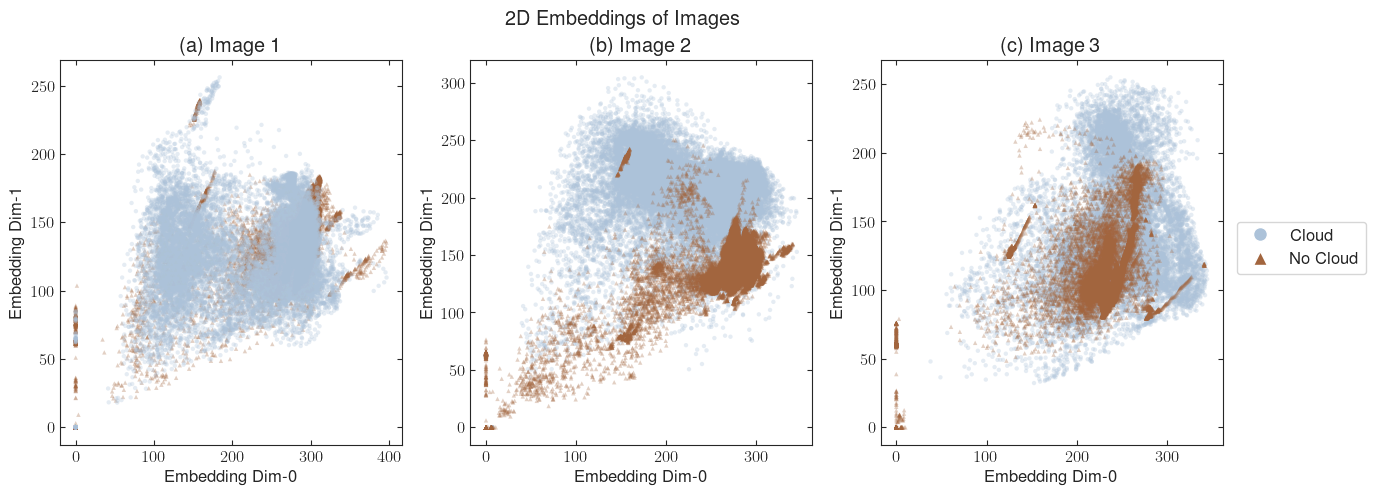

In [103]:
# plot the embeddings in 2D
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, img_df in enumerate([img_1_df, img_2_df, img_3_df]):
    for label in img_df["label"].unique():
        if label == "Unlabeled":
            continue
        subset = img_df[img_df["label"] == label]
        axs[i].scatter(subset["embedding_0"], subset["embedding_1"], c=color_map[label], label=label, edgecolor="none", s=10, alpha=0.3, marker=shape_map[label])
    axs[i].set_xlabel("Embedding Dim-0")
    axs[i].set_ylabel("Embedding Dim-1")
    axs[i].set_title(f"({chr(97+i)}) Image {i+1}")
    
# Add global legend
handles = [
    plt.Line2D(
        [0], 
        [0], 
        marker=shape_map[label],
        color="w", 
        markerfacecolor=color_map[label],
        markersize=10, 
        label=label
    ) for label in ["Cloud", "No Cloud"]]
fig.legend(handles=handles, loc="center right")
# Add global title
plt.suptitle("2D Embeddings of Images")
plt.savefig("../figs/embeddings.pdf")
plt.show()


In [106]:
all_imgs_df = pd.concat([img_1_df, img_2_df, img_3_df])
all_imgs_labeled_df = all_imgs_df[all_imgs_df["label"] != "Unlabeled"]

# Calculate the correlation of the embeddings with the label
correlations = all_imgs_labeled_df[["embedding_0", "embedding_1"]].apply(lambda x: pointbiserialr(label_bool, x)[0])



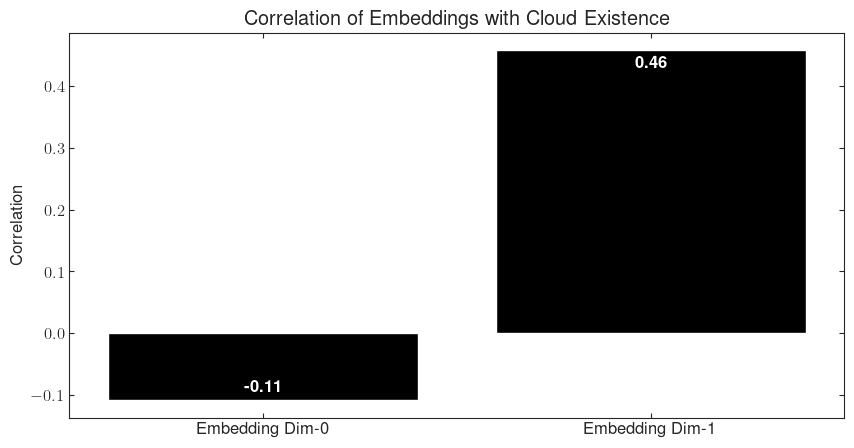

In [116]:
# Plot bar plot of correlation of each feature with label
fig, ax = plt.subplots(figsize=(10, 5))
# Create bar plot
sns.barplot(x=correlations.index, y=correlations, color="black", ax=ax)
ax.set_title("Correlation of Embeddings with Cloud Existence")
ax.set_ylabel("Correlation")
ax.set_xlabel("")
ax.bar_label(
    ax.containers[0],
    labels=[r"\textbf{" + f"{p:.2}" + r"}" for p in correlations],
    fontsize=12,
    color="white",
    weight="bold",
    label_type="edge",
    padding=-15,
)
plt.xticks([0, 1], ["Embedding Dim-0", "Embedding Dim-1"])
    
plt.savefig("../../figs/correlation_embeddings.pdf")
plt.show()

# Plot Train and Validation Loss

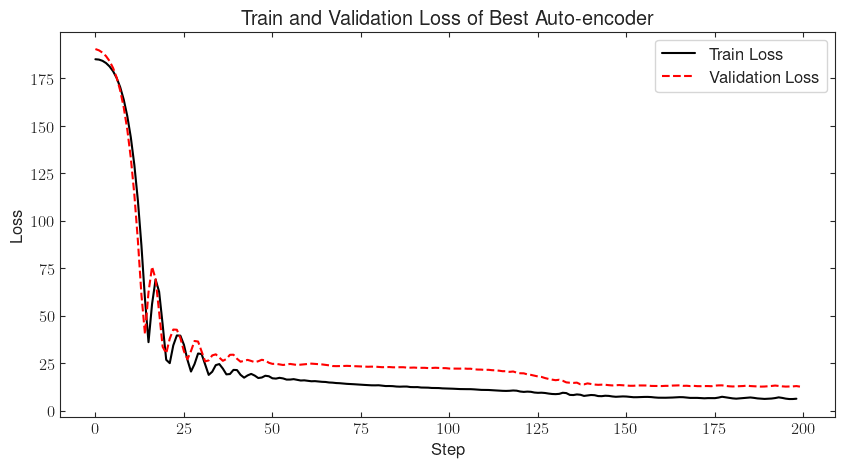

In [86]:
# Load train and validation loss data
train_loss = pd.read_csv("../../data/train_loss.csv", header=0, names=["step", "loss"], usecols=[0, 1])
val_loss = pd.read_csv("../../data/val_loss.csv", header=0, names=["step", "loss"], usecols=[0, 1])

# Plot the loss data
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(train_loss["step"], train_loss["loss"], color="black", label="Train Loss")
ax.plot(val_loss["step"], val_loss["loss"], color="red", linestyle="--", label="Validation Loss")
ax.set_title("Train and Validation Loss of Best Auto-encoder")
ax.set_xlabel("Step")
ax.set_ylabel("Loss")
ax.legend()
plt.savefig("../../figs/autoencoder_loss.pdf")
plt.show()
